# Opening

Opening, gürültüyü temizlemek ve istenmeyen küçük nesneleri kaldırmak için idealdir. Özellikle, nesnenin genel yapısını koruyarak küçük beyaz piksellerden (gürültüden) kurtulmak için kullanılır.

<code>cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)</code>

**Parameters:** <br>
-> **image:** Input Image array. <br>
-> **cv2.MORPH_OPEN:** Applying the Morphological Opening operation. <br>
-> **kernel:** Structuring element. 

In [1]:
import numpy as np
import cv2

img = cv2.imread("apple1.jpg",0)

ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

kernel = np.ones((7,7),dtype=np.uint8)

whiteNoise = np.random.randint(0,2,size=thresh1.shape[:2])
whiteNoise = whiteNoise*255
noise_img = whiteNoise + thresh1

opening = cv2.morphologyEx(noise_img.astype(np.float32),cv2.MORPH_OPEN,kernel)

cv2.imshow("Original",img)
cv2.imshow("threshold",thresh1)
cv2.imshow("Opening",opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Closing

**Kapanma (Closing)** işlemi OpenCV'de kullanılan bir morfolojik operasyondur ve temelde bir görüntüdeki küçük boşlukları veya ince siyah alanları kapatmak için kullanılır. Kapanma, bir görüntüye ilk olarak bir genişletme (dilation) ve ardından bir aşındırma (erosion) işlemi uygulayarak gerçekleştirilir.<br>

Genişletme adımında beyaz alanlar genişletilir ve küçük siyah boşluklar kapanır. Ardından yapılan aşındırma işlemi, genişletme sonrası görüntünün boyutlarını orijinal şekline yaklaştırır. Bu yöntem, genellikle nesne çevresindeki küçük deliklerin veya nesneler arasındaki ince boşlukların doldurulmasında etkilidir.

<code>cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)</code><br>


**Parameters:**<br>

-> **image:** Input Image array.<br>

-> **cv2.MORPH_CLOSE:** Applying the Morphological Closing operation.<br>

-> **kernel:** Structuring element.<br>

---------------------------------------


In [ ]:
import cv2
import numpy as np

img = cv2.imread('apple1.jpg', 0)  # Gri tonlamalı şekilde görselimizi yükledik

# Maske (kernal) oluştur
kernel = np.ones((5, 5), np.uint8)  # 5x5 boyutunda bir kare maske

# Kapanma işlemi uygulama
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Sonuçları göster
cv2.imshow("orijnal img",img)
cv2.imshow("closing uygulanmış",closing)


#sonucumuzu kaydediyoruz
cv2.imwrite("kapanma uygulanan.png",closing)



cv2.waitKey(0)
cv2.destroyAllWindows()

# Gradyanlar

>gradyan,görüntüdeki yoğunluk veya renkteki yönlü bir değişiklik.

>kenar algılamada kullanılır

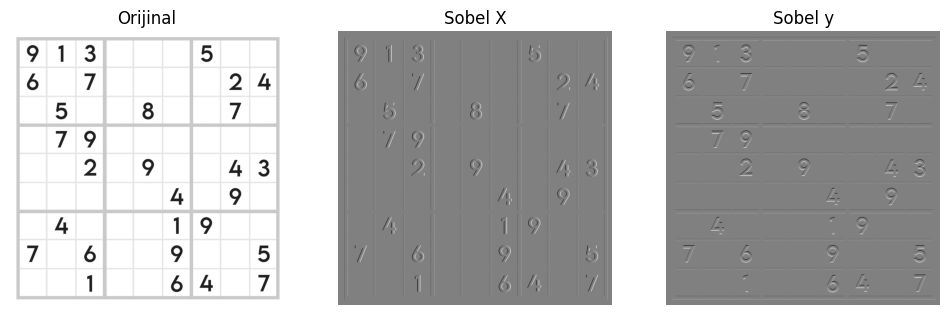

In [ ]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("sudoku.jpg", 0)

#sobel
sobelx = cv2.Sobel(image, ddepth=cv2.CV_16S, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(image, ddepth=cv2.CV_16S, dx=0, dy=1, ksize=5)

# Orijinal ve Sobel X çıktısını yan yana göstermek için
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
ax[0].imshow(image, cmap="gray")
ax[0].axis("off")
ax[0].set_title("Orijinal")

ax[1].imshow(sobelx, cmap="gray")
ax[1].axis("off")
ax[1].set_title("Sobel X")

ax[2].imshow(sobely, cmap="gray")
ax[2].axis("off")
ax[2].set_title("Sobel y")



plt.savefig("sobel.png") #çıktımızı kaydetme
plt.show()

# HAARCASCAADE

>Haar Cascade sınıflandırıcısı, bilgisayarlı görü çalışmalarında nesne tespiti için kullanılan bir makine öğrenimi algoritmasıdır. Yani, bir resimde belirli nesneleri bulmak için kullanılır. Örneğin, yüzler, gözler, araçlar gibi nesnelerin tespitinde yaygın olarak kullanılır.En temel manada belirli bir algoritmaya göre bulunması istenen nesneler önce bilgisayara tanıtılır ve daha sonra ona benzer şekillerin bulunduğu resimler veya video frameleri taranarak o nesne bulunmaya çalışılır.


# Yüz Tespiti

In [13]:
import cv2

# Yüz tespiti için CascadeClassifier nesnesini oluşturma
face_cascaded = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Görüntüyü okuma
img = cv2.imread("real2.jpeg")

# Görüntüyü gri tonlamalı formata dönüştürme (Haar Cascade gri tonlamalı çalışır)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Yüzleri algılama (ölçeklendirme faktörü, komşu kutu sayısı ve minimum boyut belirtiliyor)
faces = face_cascaded.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))

# Algılanan yüzler üzerinde gezinme
for (x, y, w, h) in faces:
    # Algılanan yüz etrafına bir dikdörtgen çizme
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)


# İşlenmiş görüntüyü bir pencere içinde gösterme
cv2.imshow("pencere", img)

# İşlenmiş görüntüyü dosyaya kaydetme
cv2.imwrite("haarcascade2.png", img)

# Görüntü penceresini kapatmayı bekleme (bir tuşa basılana kadar)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Kontür Bulma Ve Çizme

**Konturlar**, bir görüntünün sınırı boyunca aynı yoğunluğa sahip tüm noktaları birleştiren çizgi olarak tanımlanır. Konturlar şekil analizinde, ilgilenilen nesnenin boyutunu bulmada ve nesne tespitinde kullanışlıdır.
OpenCV, görüntüden konturların çıkarılmasına yardımcı olan <code>findContour()</code> işlevine sahiptir. <br>
En iyi ikili(binary) görüntülerde çalışır, bu nedenle önce eşikleme teknikleri, Sobel kenarları vb. uygulamalıyız.



In [1]:
import cv2 
import numpy as np 

image = cv2.imread('apple1.jpg',0)

thresh = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours))) 

cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow("elma",image)
cv2.imshow("thresholding",thresh)


cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 903


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gri tonlamalı görüntüyü yükleyin
image = cv2.imread('apple1.jpg', 0)

# Adaptive thresholding uygulayın
thresh = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Konturları bulun
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Bulunan kontur sayısını yazdırın
print("Number of Contours found = " + str(len(contours)))

# Orijinal görüntüyü renkli formata çevirin
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Konturları renkli görüntü üzerine çizin
cv2.drawContours(image_color, contours, -1, (0, 255, 0), 2)

# Sonucu görüntüleyin
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Thresholding")
plt.imshow(thresh, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Konturlu Görüntü")
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# Gerçek Hayat Taskları

### Kontür Sayma ve şekil çizdirme

In [ ]:
import cv2
import numpy as np

# 1. Resimleri okuma ve boyutlarını yeniden ayarlama
image = cv2.imread('elma.jpg') 
image = cv2.resize(image, (900, 900))

image_yan = cv2.imread('elma_yandan.jpg')
image_yan = cv2.resize(image_yan, (900, 900))

# 2. Görüntüleri gri tonlamalı formata dönüştürme
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_yan = cv2.cvtColor(image_yan, cv2.COLOR_BGR2GRAY)

# 3. Gürültüyü azaltmak için Gaussian Blur uygulama
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
blurred_yan = cv2.GaussianBlur(gray_yan, (5, 5), 0)

# 4. Adaptive Threshold ile görüntüleri siyah-beyaza çevirme
thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)
thresh_yan = cv2.adaptiveThreshold(
    blurred_yan, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# 5. Konturları bulma
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_yan, _ = cv2.findContours(thresh_yan, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 6. En büyük konturu seçme (elmanın konturu)
contour = max(contours, key=cv2.contourArea)
contour_yan = max(contours_yan, key=cv2.contourArea)

# 7. En uygun çemberi bulma (Minimum Enclosing Circle)
(x, y), radius = cv2.minEnclosingCircle(contour)
center = (int(x), int(y))
radius = int(radius)

(x2, y2), radius_yan = cv2.minEnclosingCircle(contour_yan)
center_yan = (int(x2), int(y2))
radius_yan = int(radius_yan)

# 8. Çemberin alanını hesaplama
circle_area = np.pi * (radius ** 2)
yukseklik = radius_yan * 2  # Yandan görüntüdeki çember yüksekliği

# 9. Çemberi ve konturları görüntü üzerine çizme
output_image = image.copy()
cv2.circle(output_image, center, radius, (0, 255, 0), 2)  # Yeşil çember
cv2.drawContours(output_image, [contour], -1, (255, 0, 0), 2)  # Mavi kontur

# Yandan görüntü işlemleri
output_image_yan = thresh_yan.copy()
cv2.circle(output_image_yan, center_yan, radius_yan, (0, 255, 0), 2)  # Yandan çember

# Yükseklik göstermek için dikey bir çizgi çizme
start_point = (center_yan[0], center_yan[1] - radius_yan)
end_point = (center_yan[0], center_yan[1] + radius_yan)
cv2.line(output_image_yan, start_point, end_point, (255, 255, 0), 2)  # Sarı çizgi

# 10. Yandan görüntüye çemberin yüksekliğini yazdırma
text3 = f"{radius_yan*2:.2f}"
cv2.putText(output_image_yan, text3, (150, 161), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

# Çember hacmini hesaplama
volume = 1.33 * circle_area * yukseklik

# 11. Hacim bilgisini yandan görüntü üzerine yazma
text2 = f"Hacim: {volume:.2f} px^3"
cv2.putText(output_image_yan, text2, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

# Çember alanını görüntü üzerine yazma
text = f"Alan: {circle_area:.2f} px^2"
cv2.putText(output_image, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

# 12. Sonuçları ekrana yazdırma
print("yuk: ", yukseklik)
print(f"Çemberin Alanı: {circle_area:.2f} birim kare")
print(f"Çemberin hacmi: {volume:.2f} birim küp")

# 13. Görüntüleri gösterme
cv2.imshow('Original Image', image)
cv2.imshow('Original_yan Image', image_yan)
cv2.imshow('Threshold Image', thresh)
cv2.imshow('Threshold_yan image', thresh_yan)
cv2.imshow('Contour and Circle', output_image)
cv2.imshow('yandan', output_image_yan)

# 14. İşlenmiş görüntüleri dosyaya kaydetme
cv2.imwrite("alan.png", output_image)
cv2.imwrite("adaptive_thresholding.png", thresh)
cv2.imwrite("hacim.png", output_image_yan)
cv2.imwrite("adaptive_thresholding_yan.png", thresh_yan)
cv2.imwrite("yan_thth.png", output_image_yan)

# 15. Program sonlandırma
cv2.waitKey(0)
cv2.destroyAllWindows()


<img src="./hacim ve alan.png" alt="Getting started" width="600" height="400" />

### Threshold ile kitle Belirginleştirme (Teknofest2024 Sağlıkta Yapay Zeka Taskı)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1. Görüntüyü yükleme (gri tonlamalı formatta)
image_path = 'C:/Users/kemal/Desktop/opencv-egitim/RMLO_11824.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 2. Gürültüyü azaltmak için median blur uygulama
median = cv2.medianBlur(image, 5) 

# 3. Global threshold uygulama
# Piksel değerlerini belirli bir eşik seviyesine göre 0 veya 255 yapar
_, thresh_global = cv2.threshold(median, 99, 255, cv2.THRESH_BINARY)

# 4. Görselleri karşılaştırmalı olarak göstermek için bir figure oluşturma
plt.figure(figsize=(15, 5))

# Orijinal görüntüyü çizim
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")  # Başlık ekleme
plt.axis("off")  # Eksen çizgilerini gizleme

# Threshold uygulanmış görüntüyü çizim
plt.subplot(1, 2, 2)
plt.imshow(thresh_global, cmap='gray')
plt.title("Thresholding")  # Başlık ekleme
plt.axis("off")  # Eksen çizgilerini gizleme

# 5. Görüntüleri ekranda gösterme
plt.show()


# Mouse ile Çizgi Çizme

In [4]:
import cv2
import numpy as np

# Seçilen noktaların saklanacağı liste
points = []

# Fare olayını yakalayan fonksiyon
def mouse_callback(event, x, y, flags, param):
    global points

    # Sol fare tuşuna basıldığında, noktayı ekle
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))

    # Sağ fare tuşuna basıldığında, çizimi bitir
    elif event == cv2.EVENT_RBUTTONDOWN:
        points_np = np.array(points, np.int32)  # Listeyi numpy array'e çevir
        points_np = points_np.reshape((-1, 1, 2))
        cv2.polylines(canvas, [points_np], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.imshow("Polygon Selection", canvas)

# Siyah bir tuval (canvas) oluştur
canvas = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow("Polygon Selection")
cv2.setMouseCallback("Polygon Selection", mouse_callback)

while True:
    # Tuvali geçici çizimlerle güncelle
    temp_canvas = canvas.copy()
    for point in points:
        cv2.circle(temp_canvas, point, 5, (0, 0, 255), -1)

    if len(points) > 1:
        cv2.polylines(temp_canvas, [np.array(points)], isClosed=False, color=(255, 0, 0), thickness=3)

    cv2.imshow("Polygon Selection", temp_canvas)

    # 'q' tuşuna basıldığında çık
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

# Seçilen noktaları yazdır
for i, point in enumerate(points):
    print(f"Nokta {i + 1}: {point}")

Nokta 1: (75, 125)
Nokta 2: (373, 88)
Nokta 3: (405, 230)
Nokta 4: (357, 342)
Nokta 5: (204, 347)
Nokta 6: (88, 287)
Nokta 7: (75, 130)
